# Latent Semantic Analysis (LSA)

LSA reduces the dimensionality of a term-document matrix to discover latent structures in text data.

Key Method: Singular Value Decomposition (SVD).

Linear algebra-based, non-probabilistic.

Well-suited for tasks like dimensionality reduction and semantic analysis where the overall structure and relationships between words and documents is more important than explicit topics.

## 0. Setting up the evironment

Load a language model for preprocessing text in Russian

In [ ]:
!python -m spacy download ru_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("ru_core_news_sm", disable=["ner", "parser"])

A function to produce a lemmatized version of the input text

In [ ]:
def preprocessor(text):
  lemmas = list()
  doc = nlp(text)
  for token in doc:
    if token.is_alpha and token.is_stop == False:
      lemma = token.lemma_
      lemmas.append(lemma)
  return ' '.join(lemmas)

## 1. The data

In [ ]:
import pandas as pd

Read the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024/компьютерная лингвистика/unsupervised learning/sports_articles.tsv', sep='\t')
df

,headline,summary
0,Наказание за самоуверенность: Малыхин проиграл...,Анатолий Малыхин в Бангкоке потерпел сенсацион...
1,«Находится на низком уровне»: Васильев — о ско...,Если Камила Валиева по своим физическим и мент...
2,"Победа «Спартака» в дерби, долги «Лады» по зар...",«Спартак» в третий раз обыграл ЦСКА в нынешнем...
3,«Верить ему нельзя»: глава World Athletics Коу...,Президент World Athletics Себастьян Коу сообщи...
4,Затмил дуэль Кучерова и Федотова: Капризов офо...,Кирилл Капризов трижды ассистировал партнёрам ...
...,...,...
904,Короли разделки: Большунов одержал 20-ю победу...,Александр Большунов завоевал третью золотую ме...
905,"Тримуф «Канзас-Сити» в овертайме, магия Махоум...",«Канзас-Сити» взял верх над «Сан-Франциско» в ...
906,"Хет-трик Афифа с пенальти, подачи Адингры и ка...",Катар и Кот-д'Ивуар одержали победы в финалах ...
907,«Она просто быстрее и мощнее»: Касаткина уступ...,Дарья Касаткина не завоевала титул на турнире ...


## 2. Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Feature extraction

In [ ]:
documents = df['summary'].to_list()

Build the Document-Term Matrix

In [ ]:
vectorizer = TfidfVectorizer(preprocessor=preprocessor)
X = vectorizer.fit_transform(documents)
X

<909x8434 sparse matrix of type '<class 'numpy.float64'>'
	with 45579 stored elements in Compressed Sparse Row format>

In [ ]:
dtm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
dtm

,abc,aca,add,amc,ap,aquatics,ard,asia,athletic,athletics,...,ясмин,ясмина,ясмину,ясюн,ятимова,ятимову,яхта,яхтенный,яхью,яшкин
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

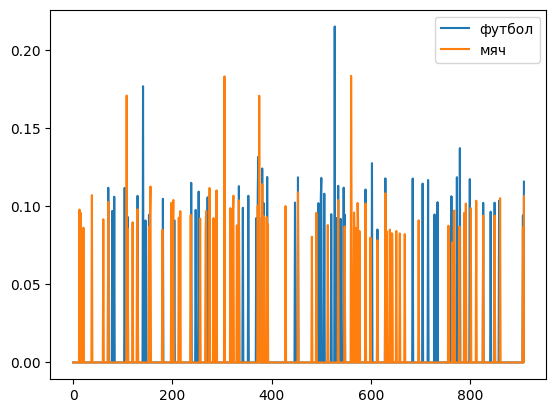

In [ ]:
dtm[['футбол', 'мяч']].plot(kind='line')

## 3. Dimensionality reduction techniques

In [ ]:
from sklearn.decomposition import TruncatedSVD

**Latent Semantic Analysis**:


In [ ]:
lsa = TruncatedSVD(n_components=5, random_state=42)

X_lsa = lsa.fit_transform(dtm)

## 4. Topics

Top *n* words for each topic

In [ ]:
top_n = 10

terms = vectorizer.get_feature_names_out()

for i, topic in enumerate(lsa.components_):
  print(f"Topic {i + 1}:")
  top_terms_idx = topic.argsort()[-top_n:][::-1]  # Get indices of top 10 terms for this topic
  top_terms = [terms[idx] for idx in top_terms_idx]
  print(" ".join(top_terms))

Topic 1:
матч первый второй встреча победа два серия нхл помочь передача
Topic 2:
нхл передача регулярный результативный шайба рейнджерс отметиться панарин забросить артемий
Topic 3:
удар минута мяч тайм рпл гость взять тур верх подопечные
Topic 4:
сет ракетка партия брейк андреев турнир гейм круг медведев мирра
Topic 5:
гонка опередить секунда бронза золото анастасия женщина достаться шевченко завоевать
Topic 6:
серия вес раунд бросок плей офф бой стэнли поединок кубок
Topic 7:
вес поединок бой ufc титул чемпион судья претендент магомед пояс
Topic 8:
катание фигурный программа александр загитов алина елизавета евгений rt обсуждать
Topic 9:
ска кхл контракт спартак локомотив цска клуб металлург авангард барс
Topic 10:
лига отставание металлург сократить шайба гагарин гретцки уэйн список период
Topic 11:
команда лига хороший история сборная уэйн гретцки клуб стэнли финал
Topic 12:
интервью рассказать объяснить rt слово специалист заявить мнение вспомнить тренер
Topic 13:
год лига чемпио

The singular values will tell you how much each topic contributes to the overall variance in the dataset. Larger singular values indicate topics that account for a larger portion of the total variance in the dataset.

In [ ]:
lsa.singular_values_

array([5.17881106, 3.40831938, 2.97134478, 2.83449433, 2.52669857,
       2.3625064 , 2.29997215, 2.19360433, 2.15641049, 2.02024547,
       1.9446361 , 1.90149788, 1.88512072, 1.85077353, 1.75898489])